In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
import cv2

In [7]:
ImgSize = 256
BatchSize = 32
Channel = 3

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Pepper",
    shuffle = True,
    image_size = (ImgSize,ImgSize),
    batch_size = BatchSize
)

Found 2475 files belonging to 2 classes.


In [10]:
classes = dataset.class_names

In [11]:
classes

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [12]:
len(dataset)

78

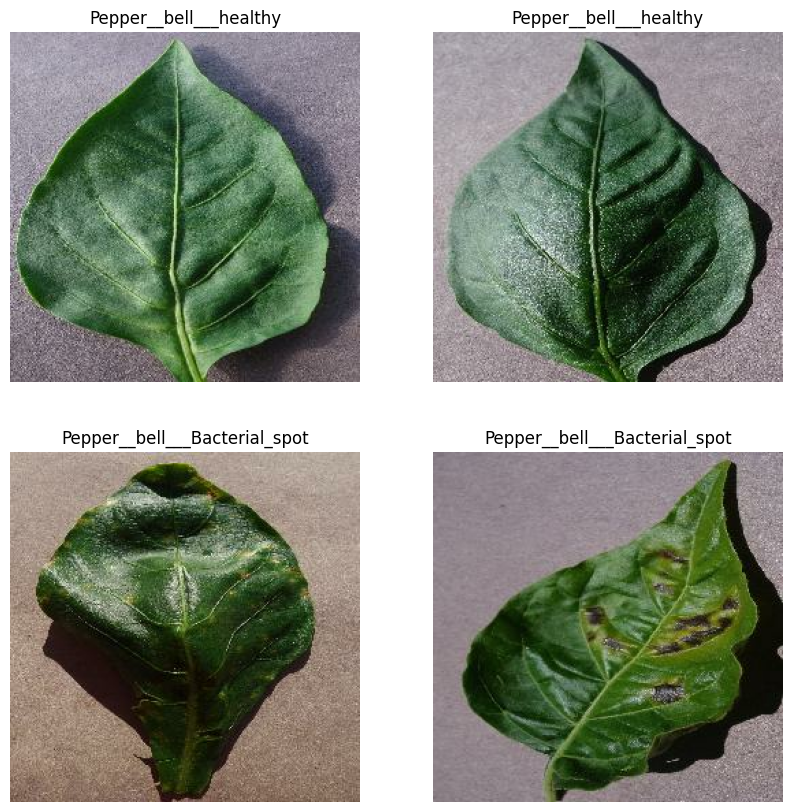

In [13]:
plt.figure(figsize=(10,10))
for image,label in dataset.take(1):
    for i in range(4):
        img = image[i]
        plt.subplot(2,2,i+1)
        plt.imshow(img.numpy().astype('uint8'))
        plt.title(classes[label[i]])
        plt.axis('off')

In [14]:
test_size = 0.1
validation_size = 0.1
train_size = 0.8

In [15]:
train_set = dataset.take(int(len(dataset)*train_size))
remaining_set = dataset.skip(int(len(dataset)*train_size))
print([len(train_set),len(remaining_set)])

[62, 16]


In [16]:
test_set=remaining_set.take(int(len(dataset)*test_size))
validation_set =remaining_set.skip(int(len(dataset)*test_size))
print([len(test_set),len(validation_set)])

[7, 9]


In [17]:
train_set = train_set.cache().shuffle(1000)
test_set = test_set.cache().shuffle(1000)
validation_set = validation_set.cache().shuffle(1000)

In [18]:
input_shape = (BatchSize,ImgSize,ImgSize,Channel)

In [19]:
resizing_and_rescaling = tf.keras.Sequential([
    layers.Resizing(ImgSize,ImgSize),
    layers.Rescaling(1/255.0)
])

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [21]:
no_of_channels = 2

In [22]:
model = tf.keras.Sequential([
    resizing_and_rescaling,
    data_augmentation,
    layers.Conv2D(32,(3,3),input_shape =input_shape,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),input_shape=input_shape,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),input_shape=input_shape,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),input_shape=input_shape,activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(32,activation='relu'),
    layers.Dense(2,activation='softmax')
])

model.build(input_shape=input_shape)

C:\Users\Praveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 12544)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 32)                    │         401,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 2)                     │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 494,754 (1.89 MB)

 Trainable params: 494,754 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history= model.fit(
    train_set,
    batch_size = BatchSize,
    epochs=10,
    verbose=1,
    validation_data = validation_set
)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.7096 - loss: 0.5750 - val_accuracy: 0.9139 - val_loss: 0.3147
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9132 - loss: 0.2994 - val_accuracy: 0.9288 - val_loss: 0.1720
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9469 - loss: 0.1960 - val_accuracy: 0.9588 - val_loss: 0.0998
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9622 - loss: 0.1047 - val_accuracy: 0.8352 - val_loss: 0.3876
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9705 - loss: 0.1318 - val_accuracy: 0.7079 - val_loss: 0.8272
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9639 - loss: 0.1381 - val_accuracy: 0.9775 - val_loss: 0.0408
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9925 - loss: 0.0462 - val_accuracy: 0.8914 - val_loss: 0.3388
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 60s 973ms/step - accuracy: 0.9921 - loss: 0.0359 - val_accuracy: 0.9963 - val_lo

In [26]:
model.evaluate(test_set)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 230ms/step - accuracy: 0.9806 - loss: 0.0621


[0.061792563647031784, 0.9776785969734192]

In [27]:

for image,label in dataset.take(1):
    img_set=model.predict(image)
    for i in range(10):
        print("actual label : ",classes[label[i]])
        print("predicted label : ",classes[np.argmax(img_set[i])],end='\n\n')
        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
actual label :  Pepper__bell___Bacterial_spot
predicted label :  Pepper__bell___Bacterial_spot

actual label :  Pepper__bell___Bacterial_spot
predicted label :  Pepper__bell___Bacterial_spot

actual label :  Pepper__bell___Bacterial_spot
predicted label :  Pepper__bell___Bacterial_spot

actual label :  Pepper__bell___healthy
predicted label :  Pepper__bell___healthy

actual label :  Pepper__bell___Bacterial_spot
predicted label :  Pepper__bell___Bacterial_spot

actual label :  Pepper__bell___healthy
predicted label :  Pepper__bell___healthy

actual label :  Pepper__bell___Bacterial_spot
predicted label :  Pepper__bell___Bacterial_spot

actual label :  Pepper__bell___healthy
predicted label :  Pepper__bell___healthy

actual label :  Pepper__bell___Bacterial_spot
predicted label :  Pepper__bell___Bacterial_spot

actual label :  Pepper__bell___healthy
predicted label :  Pepper__bell___healthy



In [29]:
import os

In [30]:
os.makedirs(f"ExampleModel/{model_version}/", exist_ok=True)

In [32]:
model_version = 1

In [34]:
model.save(f'model/{model_version}/model_pep')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=model/1/model_pep.